In [74]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import dimod
import networkx as nx
from dwave.system import DWaveSampler, EmbeddingComposite
from qiskit.visualization import plot_histogram


In [75]:
n = 20   # length of each random bit array

shots = 500
bqm_qubo = dimod.BinaryQuadraticModel.from_numpy_matrix(np.zeros((n,n)))
# sampleset = EmbeddingComposite(DWaveSampler(endpoint='https://cloud.dwavesys.com/sapi',\
#                                token='DEV-d1f6e1d1c38fbe9219ce7713e110736473b657a0', \
#                                solver={'qpu': True})).sample(bqm_qubo, num_reads = shots)
sampleset = EmbeddingComposite(DWaveSampler(solver={'qpu': True})).sample(bqm_qubo, num_reads=shots)


print(sampleset.aggregate())

     0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 ... 19 energy num_oc. ...
0    0  1  1  1  1  0  1  1  0  1  0  1  1  0  1  1 ...  1    0.0       1 ...
1    1  1  0  1  0  0  1  1  0  1  1  1  0  1  0  1 ...  0    0.0       1 ...
2    1  0  1  1  0  0  1  0  0  0  1  1  0  0  0  1 ...  1    0.0       1 ...
3    1  0  1  1  0  1  1  0  0  0  0  0  0  1  1  1 ...  0    0.0       1 ...
4    0  0  0  0  0  1  1  1  1  0  0  1  0  0  1  1 ...  0    0.0       1 ...
5    1  1  1  0  1  1  1  0  0  0  1  1  1  1  0  0 ...  1    0.0       1 ...
6    0  1  0  0  0  1  0  1  1  0  0  0  1  1  1  0 ...  1    0.0       1 ...
7    0  0  0  1  1  0  0  0  0  1  1  1  1  1  1  1 ...  0    0.0       1 ...
8    1  0  0  0  1  1  1  0  0  1  1  1  1  0  1  1 ...  1    0.0       1 ...
9    1  0  1  1  0  1  1  1  1  1  1  1  0  0  1  1 ...  1    0.0       1 ...
10   1  1  1  1  0  1  1  0  1  0  0  0  0  0  0  0 ...  0    0.0       1 ...
11   0  1  1  1  0  1  0  1  1  1  1  1  1  0  1  0 ...  0    0.

In [76]:
result = pd.DataFrame.from_records(sampleset.aggregate().record.tolist(),
                                    columns=['Samples','Energy','Occurrences','chain'])


# result = result.sort_values(by=['Energy'],ignore_index=True)
result['Numbers'] =  [(int("".join(str(x) for x in sample), 2)) for sample in result['Samples']]
result['selected'] = [(int(sum(sample))) for sample in result['Samples']]

result

,Samples,Energy,Occurrences,chain,Numbers,selected
0,"[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, ...",0.0,1,0.0,505277,14
1,"[1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, ...",0.0,1,0.0,866140,12
2,"[1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, ...",0.0,1,0.0,729885,10
3,"[1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, ...",0.0,1,0.0,745598,11
4,"[0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, ...",0.0,1,0.0,31038,10
...,...,...,...,...,...,...
494,"[1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, ...",0.0,1,0.0,700888,10
495,"[0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, ...",0.0,1,0.0,158919,10
496,"[1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, ...",0.0,1,0.0,915017,12
497,"[1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, ...",0.0,1,0.0,686406,10


In [77]:
bqm_qubo

BinaryQuadraticModel({0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0}, {}, 0.0, 'BINARY')

In [78]:
bqm_qubo.to_numpy_matrix().astype(int)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

In [79]:
result.to_csv("result.csv",index=False)

In [80]:
data = pd.read_csv("result.csv")
data

,Samples,Energy,Occurrences,chain,Numbers,selected
0,[0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1],0.0,1,0.0,505277,14
1,[1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0],0.0,1,0.0,866140,12
2,[1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1],0.0,1,0.0,729885,10
3,[1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0],0.0,1,0.0,745598,11
4,[0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0],0.0,1,0.0,31038,10
...,...,...,...,...,...,...
494,[1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0],0.0,1,0.0,700888,10
495,[0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1],0.0,1,0.0,158919,10
496,[1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1],0.0,1,0.0,915017,12
497,[1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0],0.0,1,0.0,686406,10


In [81]:
data["probability"] = data["Occurrences"]/data["Occurrences"].sum()

sample_string = []
for string in data["Samples"]:
    string = string[1:-1]
    # string.replace(" ","")
    sample_string.append("".join(string.split()))

data["samples"] = sample_string

In [82]:
my_data = data[["samples","probability"]]

my_dict = {}

for i in range(my_data.shape[0]):
    my_dict[my_data["samples"][i]] = my_data["probability"][i]



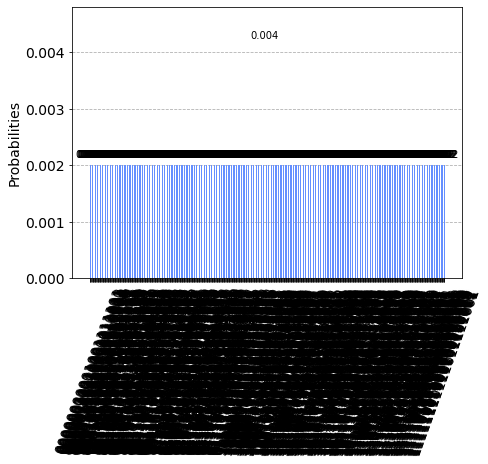

In [83]:
plot_histogram(my_dict)